In [1]:
import numpy as np
from hftbacktest import BacktestAsset, HashMapMarketDepthBacktest
from hftbacktest import Recorder
from hftbacktest.stats import LinearAssetRecord
from src.strategies.glft import gridtrading_glft_mm
from matplotlib import pyplot as plt

preprocessed_data_path = "../data/daily_processed"
daily_eod_snapshots = "../data/snapshots"

In [2]:
day_start = 2
day_end = 32
n_trading_days = day_end - day_start

data_paths = []

for i in range(day_start, day_end):
    day_file = f"../data/daily_processed/deribit_eth_perp_2025-01-{i:02d}.npz"
    data_paths.append(day_file)

eod = np.load(f"../data/snapshots/deribit_eth_perp_2025-01-{(day_start - 1):02d}_eod.npz")['data']

In [3]:
MAKER_FEE = -0.0001 
TAKER_FEE =  0.0005  

TICK_SIZE = 0.01
LOT_SIZE = 1

gamma = 0.01143319447439636
delta = 1
adj1 = 0.9314120055506834
adj2 = 0.43081606500331926
max_position=50

In [4]:
asset = (
BacktestAsset()
    .data(data_paths)
    .initial_snapshot(eod)
    .linear_asset(1.0)
    .constant_latency(10000, 10000)
    .risk_adverse_queue_model()
    .no_partial_fill_exchange()
    .trading_value_fee_model(MAKER_FEE, TAKER_FEE)
    .tick_size(TICK_SIZE)
    .lot_size(LOT_SIZE)
    .last_trades_capacity(10000)
)

hbt = HashMapMarketDepthBacktest([asset])
recorder = Recorder(1, n_trading_days* 1_000_000)

execution_times = gridtrading_glft_mm(hbt, recorder.recorder, n_trading_days, gamma, delta, adj1, adj2, max_position)
hbt.close()

Trading day:  0
Trading day:  1
Trading day:  2
Trading day:  3
Trading day:  4
Trading day:  5
Trading day:  6
Trading day:  7
Trading day:  8
Trading day:  9
Trading day:  10
Trading day:  11
Trading day:  12
Trading day:  13
Trading day:  14
Trading day:  15
Trading day:  16
Trading day:  17
Trading day:  18
Trading day:  19
Trading day:  20
Trading day:  21
Trading day:  22
Trading day:  23
Trading day:  24
Trading day:  25
Trading day:  26
Trading day:  27
Trading day:  28
Trading day:  29


0

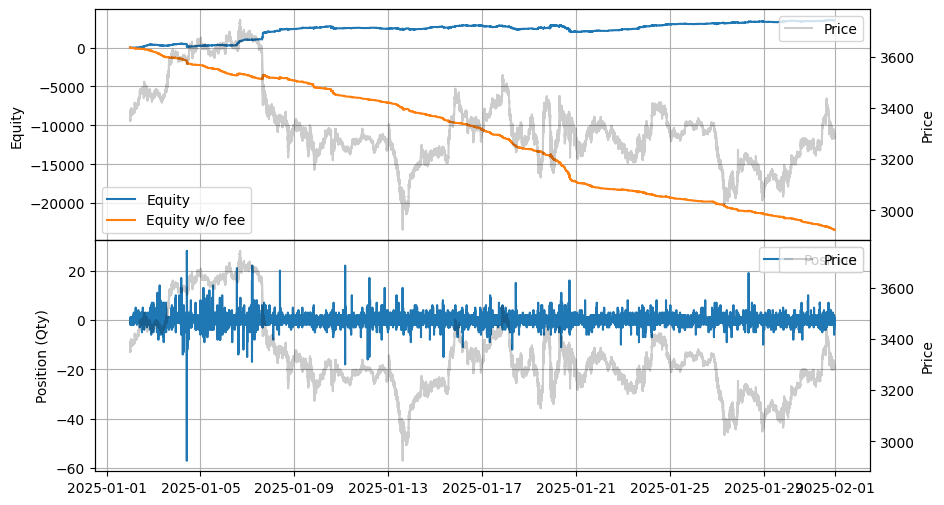

<Figure size 640x480 with 0 Axes>

In [5]:
stats = LinearAssetRecord(recorder.get(0)).stats()

stats.plot()
plt.savefig("../results/glft/full_run_glft.png")

df = stats.summary()
df.write_csv("../results/glft/metrics.csv", include_header=True)

np.save("../results/glft/execution_times.npy", execution_times)